# Análisis de Rutas Combinadas
Este notebook está dedicado a la extracción y análisis de rutas específicas que son de nuestro interés, mediante la comparación de diversas métricas asignadas a cada ruta. Utilizamos estas comparativas para identificar patrones, eficiencias o áreas de mejora en las rutas seleccionadas.

A lo largo de este análisis, generamos visualizaciones que nos permiten observar no solo las métricas de interés, sino también el contexto más amplio en el que se desarrollan nuestras rutas. Este enfoque nos facilita una comprensión más profunda de los datos, permitiéndonos tomar decisiones informadas sobre posibles ajustes o mejoras.



# Combinaciones de rutas

In [1]:
import pandas as pd
from geopy.geocoders import Photon
from geopy.geocoders import Nominatim
from unidecode import unidecode
import unidecode
import numpy as np
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt


### Cargamos Secuencias de rutas

In [ ]:
#rutaspacifico = pd.read_excel('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Rutas Pacifico.xlsx')
#rutascentro = pd.read_excel('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Rutas Centro.xlsx')
#rutasgolfo = pd.read_excel('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Rutas Golfo.xlsx')

In [ ]:
#rutaspacifico.dropna(axis=1, how='all', inplace=True)
#rutascentro.dropna(axis=1, how='all', inplace=True)
#rutasgolfo.dropna(axis=1, how='all', inplace=True)

In [ ]:
# Reemplazamos los NaN por una cadena vacía y convertimos los números a texto con el formato 'PG####'
#rutaspacifico_str = rutaspacifico.fillna('').applymap(lambda x: f'PG{int(x)}' if x != '' else '')
#rutascentro_str = rutascentro.fillna('').applymap(lambda x: f'PG{int(x)}' if x != '' else '')
#rutasgolfo_str = rutasgolfo.fillna('').applymap(lambda x: f'PG{int(x)}' if x != '' else '')


In [ ]:
# Combina las columnas en una cadena separada por comas
#rutaspacifico_str['secuencias_pacifico'] = rutaspacifico_str.apply(lambda x: ', '.join(filter(None, x)), axis=1)
#rutascentro_str['secuencias_centro'] = rutascentro_str.apply(lambda x: ', '.join(filter(None, x)), axis=1)
#rutasgolfo_str['secuencias_golfo'] = rutasgolfo_str.apply(lambda x: ', '.join(filter(None, x)), axis=1)


In [ ]:
# Crear un nuevo DataFrame con una sola columna que contiene las secuencias
#df_secuencias_pacifico = pd.DataFrame({'secuencias_pacifico': rutaspacifico_str['secuencias_pacifico']})
#df_secuencias_centro = pd.DataFrame({'secuencias_centro': rutascentro_str['secuencias_centro']})
#df_secuencias_golfo = pd.DataFrame({'secuencias_golfo': rutasgolfo_str['secuencias_golfo']})


In [ ]:
# Verificar filas duplicadas en df_secuencias_pacifico
#duplicados_pacifico = df_secuencias_pacifico.duplicated()
#print("Filas duplicadas en Pacifico:", df_secuencias_pacifico[duplicados_pacifico])

# Verificar filas duplicadas en df_secuencias_centro
#duplicados_centro = df_secuencias_centro.duplicated()
#print("Filas duplicadas en Centro:", df_secuencias_centro[duplicados_centro])

# Verificar filas duplicadas en df_secuencias_golfo
#duplicados_golfo = df_secuencias_golfo.duplicated()
#print("Filas duplicadas en Golfo:", df_secuencias_golfo[duplicados_golfo])


In [ ]:
# Eliminar filas duplicadas en df_secuencias_pacifico
#df_secuencias_pacifico = df_secuencias_pacifico.drop_duplicates()

# Eliminar filas duplicadas en df_secuencias_centro
#df_secuencias_centro = df_secuencias_centro.drop_duplicates()

# Eliminar filas duplicadas en df_secuencias_golfo
#df_secuencias_golfo = df_secuencias_golfo.drop_duplicates()


In [ ]:
# Cambiar el nombre de la columna en df_secuencias_centro
#df_secuencias_centro = df_secuencias_centro.rename(columns={'secuencias_centro': 'secuencias'})

# Cambiar el nombre de la columna en df_secuencias_golfo
#df_secuencias_golfo = df_secuencias_golfo.rename(columns={'secuencias_golfo': 'secuencias'})

# Cambiar el nombre de la columna en df_secuencias_pacifico
#df_secuencias_pacifico = df_secuencias_pacifico.rename(columns={'secuencias_pacifico': 'secuencias'})

## secuencias incorrectas, arregladon 12 de mayo

In [ ]:
df_secuencias_centro = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Centro.csv')
df_secuencias_golfo = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Golfo.csv')
df_secuencias_pacifico = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Pacifico.csv')


In [ ]:
# Unir los DataFrames
df_unido = pd.concat([df_secuencias_centro, df_secuencias_golfo, df_secuencias_pacifico], ignore_index=True)


In [ ]:
df_unido

In [ ]:
# Definir los nombres y prefijos de los identificadores para cada área
#nombres_areas = ['pacifico', 'centro', 'golfo']
#prefijos_areas = ['RP', 'RC', 'RG']

# Iterar sobre cada DataFrame y su respectivo nombre de área
#for nombre_area, prefijo_area in zip(nombres_areas, prefijos_areas):
    # Obtener el DataFrame correspondiente
#    df = globals()[f"df_secuencias_{nombre_area}"]
    
    # Generar identificadores únicos para cada secuencia en el DataFrame
#    identificadores = [f"{prefijo_area}{i+1:03d}" for i in range(len(df))]
    
    # Agregar la columna 'ID_Ruta' con los identificadores al DataFrame
#    df['ID_Ruta'] = identificadores
    
    # Reordenar las columnas
#    df = df[['ID_Ruta', 'secuencias']]
    
    # Mostrar las primeras filas del DataFrame para verificar
#    print(f"DataFrame df_secuencias_{nombre_area} con identificadores:")
#    print(df.head())
    print()


### Guardamos df con secuencias

In [ ]:
#df_secuencias_pacifico.to_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Pacifico.csv')
#df_secuencias_centro.to_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Centro.csv')
#df_secuencias_golfo.to_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Golfo.csv')

### Notas:

Al procesar las rutas, nos dimos cuenta que habia muchas secuencias duplicadas. Tambien sera importante a la hora de reproducir la ultima version del ejercicio, eliminar filas intermedias antes de procesar los datos

yaa se eliminaron de todas las combinaciones, las id poligono que no tienen valores de ciudad, tambien se corrio otra revision de duplicados y salieron 1600 + rutas posibles diferentes

# secuencias incorrectas, arregladon 14 de mayo

Integraccion de secuencias faltantes
ya estan filtradas por regiones y en un df unico en secuencias diferentes

-tenemos que integrar las secuencias faltantes a las rutas existentes(filtered_secuences), volver a contabilizar la cantidad de rutas.
luego revisar que cada una de estas tenga un valor en values_df, luego generamos los arcos.

In [ ]:
df_actualizado.to_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Final.csv')

In [2]:
df_secuencias = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Diferentes_1.csv")
df_secuencias = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Final.csv")

In [ ]:
#df_secuencias = df_secuencias[['ID_Ruta', 'Filtered_Secuencias', 'Arc_Sequences', 'Last_Five_IDs']]


In [8]:
df_secuencias

,Unnamed: 0,ID_Ruta,Filtered_Secuencias
0,0,RC0001,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."
1,1,RC0002,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."
2,2,RC0003,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."
3,3,RC0004,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."
4,4,RC0005,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."
...,...,...,...
1860,1860,NaN,"PG1695, PG1694, PG1654, PG1614, PG1574, PG1495..."
1861,1861,NaN,"PG1695, PG1694, PG1654, PG1614, PG1574, PG1495..."
1862,1862,NaN,"PG1695, PG1694, PG1654, PG1614, PG1574, PG1495..."
1863,1863,NaN,"PG1695, PG1694, PG1654, PG1614, PG1574, PG1495..."


In [ ]:
import networkx as nx

# Crear un grafo dirigido
G = nx.DiGraph()
for sequence in df_secuencias['Filtered_Secuencias']:
    nodes = sequence.split(', ')
    for i in range(len(nodes)-1):
        G.add_edge(nodes[i], nodes[i+1])

# Usar algoritmos de grafos para identificar caminos o subgrafos faltantes
# nx.shortest_path(G, source, target) podría ayudarte a encontrar caminos faltantes entre nodos conocidos


In [ ]:
import matplotlib.pyplot as plt

# Dibujar el grafo
pos = nx.spring_layout(G)  # Layout para una visualización agradable
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='#FF5733')
plt.show()


### metodologia para agregar nuevas rutas:

1) integramos inicios faltantes, en este caso faltaban los de la peninsula  se puede hacer directamente en la df original

In [4]:
# df inicios faltantes

df_inicios_faltantes = df_secuencias[['ID_Ruta', 'Filtered_Secuencias']]

df_inicios_faltantes.head()

,ID_Ruta,Filtered_Secuencias
0,RC0001,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."
1,RC0002,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."
2,RC0003,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."
3,RC0004,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."
4,RC0005,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."


In [5]:

nuevos_inicios_conectores = [
    {'nuevo_inicio': 'PG1810', 'conector': 'PG1769'},
    {'nuevo_inicio': 'PG1850, PG1811, PG1810', 'conector': 'PG1769'},
    {'nuevo_inicio': 'PG1850, PG1811, PG1772, PG1694, PG1654, PG1614', 'conector': 'PG1574'},
    {'nuevo_inicio': 'PG1695, PG1694, PG1654, PG1614', 'conector': 'PG1574'}
]

# Función para agregar los nuevos inicios a las secuencias que contienen los conectores
def agregar_inicios(df, inicios_conectores):
    nuevas_secuencias = []

    for inicio_conector in inicios_conectores:
        nuevo_inicio = inicio_conector['nuevo_inicio']
        conector = inicio_conector['conector']
        
        for secuencia in df['Filtered_Secuencias']:
            if conector in secuencia:
                # Dividir la secuencia por el conector
                partes = secuencia.split(', ')
                indice_conector = partes.index(conector)
                # Crear la nueva secuencia reemplazando la parte anterior al conector por el nuevo inicio
                nueva_secuencia = f"{nuevo_inicio}, {conector}, " + ', '.join(partes[indice_conector + 1:])
                nuevas_secuencias.append(nueva_secuencia)
    
    # Crear un nuevo DataFrame con las secuencias duplicadas y actualizadas
    df_nuevas_secuencias = pd.DataFrame({'Filtered_Secuencias': nuevas_secuencias})
    return pd.concat([df, df_nuevas_secuencias], ignore_index=True)

# Aplicar la función para agregar los nuevos inicios
df_actualizado = agregar_inicios(df_inicios_faltantes, nuevos_inicios_conectores)

# Mostrar el DataFrame actualizado
print(df_actualizado)


     ID_Ruta                                Filtered_Secuencias
0     RC0001  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...
1     RC0002  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...
2     RC0003  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...
3     RC0004  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...
4     RC0005  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...
...      ...                                                ...
2436     NaN  PG1695, PG1694, PG1654, PG1614, PG1574, PG1495...
2437     NaN  PG1695, PG1694, PG1654, PG1614, PG1574, PG1495...
2438     NaN  PG1695, PG1694, PG1654, PG1614, PG1574, PG1495...
2439     NaN  PG1695, PG1694, PG1654, PG1614, PG1574, PG1495...
2440     NaN  PG1695, PG1694, PG1654, PG1614, PG1574, PG1495...

[2441 rows x 2 columns]


In [7]:
df_actualizado

,ID_Ruta,Filtered_Secuencias
0,RC0001,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."
1,RC0002,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."
2,RC0003,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."
3,RC0004,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."
4,RC0005,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."
...,...,...
2436,NaN,"PG1695, PG1694, PG1654, PG1614, PG1574, PG1495..."
2437,NaN,"PG1695, PG1694, PG1654, PG1614, PG1574, PG1495..."
2438,NaN,"PG1695, PG1694, PG1654, PG1614, PG1574, PG1495..."
2439,NaN,"PG1695, PG1694, PG1654, PG1614, PG1574, PG1495..."


In [9]:
# Filtrar los ID_Ruta que comienzan con 'RG' y no son NaN
df_rg = df_secuencias[df_secuencias['ID_Ruta'].str.startswith('RG', na=False)]

# Obtener el último número usado en los ID_Ruta con prefijo 'RG'
ultimo_numero_rg = df_rg['ID_Ruta'].str.extract(r'(\d+)$').astype(int).max().values[0]

# Filtrar las filas con NaN en ID_Ruta
df_nan = df_secuencias[df_secuencias['ID_Ruta'].isna()]

# Generar los nuevos ID_Ruta
nuevos_ids = [f"RG{str(i).zfill(4)}" for i in range(ultimo_numero_rg + 1, ultimo_numero_rg + 1 + len(df_nan))]

# Asignar los nuevos ID_Ruta a las filas con NaN
df_secuencias.loc[df_secuencias['ID_Ruta'].isna(), 'ID_Ruta'] = nuevos_ids

# Mostrar el DataFrame actualizado
print(df_secuencias)

      Unnamed: 0 ID_Ruta                                Filtered_Secuencias
0              0  RC0001  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...
1              1  RC0002  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...
2              2  RC0003  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...
3              3  RC0004  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...
4              4  RC0005  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...
...          ...     ...                                                ...
1860        1860  RG0839  PG1695, PG1694, PG1654, PG1614, PG1574, PG1495...
1861        1861  RG0840  PG1695, PG1694, PG1654, PG1614, PG1574, PG1495...
1862        1862  RG0841  PG1695, PG1694, PG1654, PG1614, PG1574, PG1495...
1863        1863  RG0842  PG1695, PG1694, PG1654, PG1614, PG1574, PG1495...
1864        1864  RG0843  PG1695, PG1694, PG1654, PG1614, PG1574, PG1495...

[1865 rows x 3 columns]


### integraciones de arcos (intermedios) faltantes en rutas

1) crear nuevos inicios, vamos a definir un nuevo set de nuevos inicios en una ubicacion diferente al original. vamos a filtrar usando la columna ID_Ruta, todas las filas que tengan en su id el prefijo seleccionado y despues vamos a extraer de todas las secuencias disponibles que contengan determinado conector en una nueva lista diferente a la base de datos original. a estos duplicados se remplazara la parte posterior al conector por una nueva secuencia.

2) el paso dos es la misma logica que el ejercicio anterior.tenemos la df: df_general y tenemos una nueva lista de inicios diferentes que acabamos de generar, las cuales usaremos con un nuevo conector target el cual duplicaremos y remplazaremos en la fila duplicada la parte antes de cada conector por cada nuevo inicio de nuestra lista.

In [10]:
df_general = df_secuencias

In [ ]:
df_general

In [52]:
df_rg = df_rg_actualizado_sin_duplicados

In [72]:
df_unida.to_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Final.csv')

In [ ]:
values_df = pd.read_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/df_valores_rutas.csv')

In [ ]:
dfvalores.head()

In [ ]:
dfvalores.shape

In [ ]:
# Sort the DataFrame by 'eventos' in descending order
df_sorted = dfvalores.sort_values(by='inm_30km', ascending=False)

# If you want to reset the index after sorting and drop the old index
df_sorted = df_sorted.reset_index(drop=True)

print(df_sorted)

#### Ciudad Top (Detenciones)

Filtramos el df de manera que nos quede la ciudad con mas detenciones de cada grid

#### Aqui tenemos que tomar la decision de como sacar el punto de referencia para asignar el valor de cada ruta:

    a) Agrupamos por 'ID_Poligono' y encontramos la ciudad con el máximo número de 'detenciones' para cada grupo
    b) Agrupamos por 'ID_Poligono' y sacamos el promedio de 'detenciones' de todas las ciudades para cada grupo
    
  R: Aplicaremos metodo de promedio

In [ ]:
# Agrupamos por 'ID_Poligono' y encontramos la ciudad con el máximo número de 'detenciones' para cada grupo
ciudades_top_valores = dfvalores.loc[dfvalores.groupby('ID_Poligono')['eventos'].idxmax()]

# Calcular el promedio de detenciones para cada 'ID_Poligono' y redondearlo sin decimales
promedio_detenciones = dfvalores.groupby('ID_Poligono')['eventos'].mean().round(0)

# Resetear el índice si es necesario
ciudades_top_valores.reset_index(drop=True, inplace=True)

# Agregar la columna 'promedio_detenciones' al DataFrame resultante
ciudades_top_valores['promedio_eventos'] = ciudades_top_valores['ID_Poligono'].map(promedio_detenciones)

# Mostramos las primeras filas del nuevo DataFrame para verificar
print(ciudades_top_valores.head())




In [ ]:
ciudades_top_valores.head(60)

# Generación de visuales

### Pacifico

##### RP105

In [ ]:
# Paso 1: Encuentra la secuencia para 'RG142' en 'df_filtrado2_sorted'
secuencia_ruta1 = df_pacifico_sumas.loc[df_pacifico_sumas['ID_Ruta'] == 'RP105', 'secuencia'].iloc[0]

# Paso 2: Separa esa secuencia en una lista de 'ID_Poligono'
secuencia_lista = secuencia_ruta1.split(', ')

# Paso 3: Filtra 'ciudades_top_valores' para conservar solo las filas con esos 'ID_Poligono'
filtered_ciudades = ciudades_top_valores[ciudades_top_valores['ID_Poligono'].isin(secuencia_lista)]

#Paso 4: Crear una columna 'Order' en 'filtered_ciudades' que asigne a cada 'ID_Poligono' su posición en la secuencia
order_dict = {id_poly: order for order, id_poly in enumerate(secuencia_lista)}
filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)

# Ordenar 'filtered_ciudades' por la columna 'Order'
ruta_RP105 = filtered_ciudades.sort_values('Order')

In [ ]:
ruta_RP105.head(3)

In [ ]:
# Cambiar los nombres de las columnas
ruta_RP105 = ruta_RP105.rename(columns={
    'detenciones': 'eventos',
    'promedio_detenciones': 'promedio_eventos',
    'detenciones_in_grid': 'eventos_in_grid'
})

In [ ]:
# Convertir columnas de datos cuantitativos a numérico
quantitative_columns = ['eventos', 'eventos_in_grid', 'inm_30km', 'inm_in_grid', 'inm_in_estado', 'sc_30km', 'sc_in_grid', 'sc_in_estado','promedio_eventos']
for col in quantitative_columns:
    ruta_RP105[col] = pd.to_numeric(ruta_RP105[col])

# Convertir DataFrame en GeoDataFrame
gdf = gpd.GeoDataFrame(
    ruta_RP105, 
    geometry=gpd.points_from_xy(ruta_RP105.longitud, ruta_RP105.latitud),
    crs="EPSG:4326"
)

# Guardar como Shapefile
output_filename = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/pacifico/RP105/RP105.shp"
#gdf.to_file(output_filename)

# Guardar como CSV
output_filename_csv = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/pacifico/RP105/RP105.csv"
ruta_RP105.to_csv(output_filename_csv, index=False)

In [ ]:
ruta_RP105 = pd.read_csv("/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/pacifico/RP105/RP105.csv")

In [ ]:
# Normalize the 'ciudad' values to ensure there are only up to 62 unique points
unique_cities = ruta_RP105['ciudad'].unique()[:62]
ruta_RP105_filtered = ruta_RP105[ruta_RP105['ciudad'].isin(unique_cities)]

# Cap the 'eventos' at 50,000
ruta_RP105_filtered['eventos_capped'] = np.clip(ruta_RP105_filtered['eventos'], None, 50000)

# Create the figure and axis for the combined plot
fig, ax1 = plt.subplots(figsize=(20, 6))

# Configure the line plot for 'Eventos'
ax1.plot(ruta_RP105_filtered['ciudad'], ruta_RP105_filtered['eventos_capped'], color='black', label='Eventos', marker='o')

# Fill the area under the line plot with a very transparent red color
ax1.fill_between(ruta_RP105_filtered['ciudad'], 0, ruta_RP105_filtered['eventos_capped'], color='red', alpha=0.1)

# Annotate points that are capped
for i, (city, val) in enumerate(zip(ruta_RP105_filtered['ciudad'], ruta_RP105_filtered['eventos'])):
    if val > 50000:
        ax1.annotate('50k+', xy=(i, 50000), xytext=(0, 3), 
                     textcoords="offset points", ha='center', va='bottom')

# Set y-axis for 'Eventos' with a max value of 50,000 and ticks every 10,000
ax1.set_ylim(0, 50000)
ax1.set_yticks(np.arange(0, 50001, 10000))
ax1.set_ylabel('Eventos', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Rotate the x-axis labels for better visualization
ax1.set_xticks(range(len(unique_cities)))
ax1.set_xticklabels(unique_cities, rotation=45, ha="right")

# Set bar width
bar_width = 0.35

# Calculate bar positions
bar_positions_inm = np.arange(len(unique_cities)) - bar_width / 2
bar_positions_sc = np.arange(len(unique_cities)) + bar_width / 2

# Create the individual bars for 'inm_30km' and 'sc_30km' on the secondary axis
ax2 = ax1.twinx()
bars_inm = ax2.bar(bar_positions_inm, ruta_RP105_filtered['inm_30km'], width=bar_width, label='inm_30km', color='blue', edgecolor='black', alpha=0.6)
bars_sc = ax2.bar(bar_positions_sc, ruta_RP105_filtered['sc_30km'], width=bar_width, label='sc_30km', color='green', edgecolor='black', alpha=0.6)

# Drawing horizontal lines inside the bars to represent each unit
def draw_bar_units(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax2.hlines(range(0, int(bar_height), 1), bar.get_x(), bar.get_x() + bar.get_width(), color='black', linewidth=0.5)

draw_bar_units(bars_inm)
draw_bar_units(bars_sc)

#ax2.set_ylabel('Total de inm_30km y sc_30km', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title of the plot
plt.title('ruta_RP105')

# Adjust the layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


##### RP639

In [ ]:
# Paso 1: Encuentra la secuencia para 'RG142' en 'df_filtrado2_sorted'
secuencia_ruta1 = df_pacifico_sumas.loc[df_pacifico_sumas['ID_Ruta'] == 'RP639', 'secuencia'].iloc[0]

# Paso 2: Separa esa secuencia en una lista de 'ID_Poligono'
secuencia_lista = secuencia_ruta1.split(', ')

# Paso 3: Filtra 'ciudades_top_valores' para conservar solo las filas con esos 'ID_Poligono'
filtered_ciudades = ciudades_top_valores[ciudades_top_valores['ID_Poligono'].isin(secuencia_lista)]

#Paso 4: Crear una columna 'Order' en 'filtered_ciudades' que asigne a cada 'ID_Poligono' su posición en la secuencia
order_dict = {id_poly: order for order, id_poly in enumerate(secuencia_lista)}
filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)

# Ordenar 'filtered_ciudades' por la columna 'Order
ruta_RP639 = filtered_ciudades.sort_values('Order')

# Cambiar los nombres de las columnas
ruta_RP639 = ruta_RP639.rename(columns={
    'detenciones': 'eventos',
    'promedio_detenciones': 'promedio_eventos',
    'detenciones_in_grid': 'eventos_in_grid'
})

In [ ]:
# Convertir columnas de datos cuantitativos a numérico
quantitative_columns = ['eventos', 'eventos_in_grid', 'inm_30km', 'inm_in_grid', 'inm_in_estado', 'sc_30km', 'sc_in_grid', 'sc_in_estado','promedio_eventos']
for col in quantitative_columns:
    ruta_RP639[col] = pd.to_numeric(ruta_RP639[col])

# Convertir DataFrame en GeoDataFrame
gdf = gpd.GeoDataFrame(
    ruta_RP639, 
    geometry=gpd.points_from_xy(ruta_RP639.longitud, ruta_RP639.latitud),
    crs="EPSG:4326"
)

# Guardar como Shapefile
output_filename = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/golfo/RP639/RP6395.shp"
gdf.to_file(output_filename)

# Guardar como CSV
output_filename_csv = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/golfo/RP639/RP639.csv"
ruta_RP639.to_csv(output_filename_csv, index=False)








In [ ]:
ruta_RP639 = pd.read_csv("/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/rutas_creadas/pacifico/RP639/RP639.csv")

In [ ]:
# Normalize the 'ciudad' values to ensure there are only up to 62 unique points
unique_cities = ruta_RP639['ciudad'].unique()[:62]
ruta_RP639_filtered = ruta_RP639[ruta_RP639['ciudad'].isin(unique_cities)]

# Cap the 'eventos' at 50,000
ruta_RP639_filtered['eventos_capped'] = np.clip(ruta_RP639_filtered['eventos'], None, 50000)

# Create the figure and axis for the combined plot
fig, ax1 = plt.subplots(figsize=(18, 6))

# Configure the line plot for 'Eventos'
ax1.plot(ruta_RP639_filtered['ciudad'], ruta_RP639_filtered['eventos_capped'], color='black', label='Eventos', marker='o')

# Fill the area under the line plot with a very transparent red color
ax1.fill_between(ruta_RP639_filtered['ciudad'], 0, ruta_RP639_filtered['eventos_capped'], color='red', alpha=0.1)

# Annotate points that are capped
for i, (city, val) in enumerate(zip(ruta_RP639_filtered['ciudad'], ruta_RP639_filtered['eventos'])):
    if val > 50000:
        ax1.annotate('50k+', xy=(i, 50000), xytext=(0, 3), 
                     textcoords="offset points", ha='center', va='bottom')

# Set y-axis for 'Eventos' with a max value of 50,000 and ticks every 10,000
ax1.set_ylim(0, 50000)
ax1.set_yticks(np.arange(0, 50001, 10000))
ax1.set_ylabel('Eventos', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Rotate the x-axis labels for better visualization
ax1.set_xticks(range(len(unique_cities)))
ax1.set_xticklabels(unique_cities, rotation=45, ha="right")

# Set bar width
bar_width = 0.35

# Calculate bar positions
bar_positions_inm = np.arange(len(unique_cities)) - bar_width / 2
bar_positions_sc = np.arange(len(unique_cities)) + bar_width / 2

# Create the individual bars for 'inm_30km' and 'sc_30km' on the secondary axis
ax2 = ax1.twinx()
bars_inm = ax2.bar(bar_positions_inm, ruta_RP639_filtered['inm_30km'], width=bar_width, label='inm_30km', color='blue', edgecolor='black', alpha=0.6)
bars_sc = ax2.bar(bar_positions_sc, ruta_RP639_filtered['sc_30km'], width=bar_width, label='sc_30km', color='green', edgecolor='black', alpha=0.6)

# Drawing horizontal lines inside the bars to represent each unit
def draw_bar_units(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax2.hlines(range(0, int(bar_height), 1), bar.get_x(), bar.get_x() + bar.get_width(), color='black', linewidth=0.5)

draw_bar_units(bars_inm)
draw_bar_units(bars_sc)

#ax2.set_ylabel('Total de inm_30km y sc_30km', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title of the plot
plt.title('ruta_RP105')

# Adjust the layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

## Metricas de Vulnerabilidad

In [73]:

combined_rutas = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Final.csv")




In [74]:
combined_rutas

,Unnamed: 0,ID_Ruta,Filtered_Secuencias
0,0,RG0001,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."
1,1,RG0002,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."
2,2,RG0003,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."
3,3,RG0004,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."
4,4,RG0005,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."
...,...,...,...
4703,4703,RG4704,"PG1572, PG1573, PG1534, PG1456, PG1417, PG1378..."
4704,4704,RG4705,"PG1531, PG1532, PG1533, PG1494, PG1456, PG1417..."
4705,4705,RG4706,"PG1531, PG1532, PG1533, PG1494, PG1456, PG1417..."
4706,4706,RG4707,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414..."


In [78]:
# Save the DataFrame to the CSV file
combined_rutas.to_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Final.csv", index=False)


In [75]:
def create_arc_sequence(secuencia):
    # Split the sequence into individual IDs
    ids = secuencia.split(', ')
    # Create arcs by pairing consecutive IDs
    arcs = [f'{ids[i]}-{ids[i+1]}' for i in range(len(ids) - 1)]
    return ', '.join(arcs)


In [76]:
combined_rutas['Arc_Sequences'] = combined_rutas['Filtered_Secuencias'].apply(create_arc_sequence)


In [77]:
combined_rutas

,Unnamed: 0,ID_Ruta,Filtered_Secuencias,Arc_Sequences
0,0,RG0001,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P..."
1,1,RG0002,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P..."
2,2,RG0003,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P..."
3,3,RG0004,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P..."
4,4,RG0005,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P..."
...,...,...,...,...
4703,4703,RG4704,"PG1572, PG1573, PG1534, PG1456, PG1417, PG1378...","PG1572-PG1573, PG1573-PG1534, PG1534-PG1456, P..."
4704,4704,RG4705,"PG1531, PG1532, PG1533, PG1494, PG1456, PG1417...","PG1531-PG1532, PG1532-PG1533, PG1533-PG1494, P..."
4705,4705,RG4706,"PG1531, PG1532, PG1533, PG1494, PG1456, PG1417...","PG1531-PG1532, PG1532-PG1533, PG1533-PG1494, P..."
4706,4706,RG4707,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P..."


### generacion de arcos

In [81]:
values_df = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/df_valores_rutas.csv')


In [141]:
import pandas as pd
from geopy.geocoders import Photon
from geopy.geocoders import Nominatim
from unidecode import unidecode
import unidecode
import numpy as np
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
#arc_df = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos.csv')

### dato de distancias a pie y tiempo

In [ ]:
def calculate_totals(row, df):
    total_distance = 0
    total_duration = 0
    # Iterate through each tuple in the transformed sequences
    for pair in row['Transformed_Sequences']:
        # Filter sorted_df for rows matching the current pair
        matching_rows = df[df['Node_Pair'] == pair]
        total_distance += matching_rows['Distance_km'].sum()
        total_duration += matching_rows['Duration_hr'].sum()
    return pd.Series([total_distance, total_duration])

# Apply the function to df_unique
df_unique[['Total_Distance_km', 'Total_Duration_hr']] = df_unique.apply(calculate_totals, args=(sorted_df,), axis=1)


###
tengo que eliminar grids que no son nodos, para esto podemos tomar secuencias_diferentes y df valores, y de secuencias diferentes, quitar todas los codigos de grid que no tengan un valor en df_valores. b)buscar duplicados c) sacar arcos, d) correr distancias y tiempo.

notas:



In [84]:
combined_rutas = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Final.csv")

In [83]:
valid_ids = set(values_df['ID_Poligono'])

In [86]:
combined_rutas.head(9)

,Unnamed: 0,ID_Ruta,Filtered_Secuencias,Arc_Sequences
0,0,RG0001,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P..."
1,1,RG0002,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P..."
2,2,RG0003,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P..."
3,3,RG0004,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P..."
4,4,RG0005,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P..."
5,5,RG0006,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P..."
6,6,RG0007,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P..."
7,7,RG0008,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P..."
8,8,RG0009,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P..."


In [ ]:
# Check for duplicates across all columns
duplicates = combined_rutas.duplicated(keep=False)  # `keep=False` marks all duplicates

# Count total duplicates
total_duplicates = duplicates.sum()

# Print the number of duplicate rows
print(f"Total duplicate rows: {total_duplicates}")

# Optionally, display the duplicate rows
if total_duplicates > 0:
    print("Duplicate rows:")
    print(combined_rutas[duplicates])


In [ ]:
#combined_rutas.to_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Diferentes_1.csv')


### final de filtrado de secuencias

## toca extraer de nuevo los diferentes arcos posibles

In [101]:
from itertools import combinations

def generate_pairwise_combinations(ids):
    # Split the IDs string into a list if not already a list
    id_list = ids.split(', ') if isinstance(ids, str) else ids
    # Generate all pairwise combinations for the last five IDs
    pairwise_combinations = list(combinations(id_list, 2))
    return pairwise_combinations


In [102]:
# Split the 'Arc_Sequences' into lists of arcs and explode into separate rows
arc_df12 = combined_rutas['Arc_Sequences'].str.split(', ').explode().reset_index(drop=True).to_frame()

# Rename the column to a more descriptive name
arc_df12.columns = ['Arc']


In [104]:
# Check for duplicates across all columns
duplicates = arc_df12.duplicated(keep=False)  # `keep=False` marks all duplicates

# Count total duplicates
total_duplicates = duplicates.sum()

# Print the number of duplicate rows
print(f"Total duplicate rows: {total_duplicates}")

# Optionally, display the duplicate rows
if total_duplicates > 0:
    print("Duplicate rows:")
    print(arc_df12[duplicates])


Total duplicate rows: 118517
Duplicate rows:
                  Arc
0       PG1529-PG1530
1       PG1530-PG1491
2       PG1491-PG1492
3       PG1492-PG1453
4       PG1453-PG1414
...               ...
118512  PG1229-PG1192
118513  PG1192-PG1193
118514  PG1193-PG1232
118515  PG1232-PG1233
118516  PG1233-PG1272

[118517 rows x 1 columns]


In [105]:
# Remove duplicates and keep the first occurrence
arc_df12 = arc_df12.drop_duplicates()

# Print the number of rows after removing duplicates
print(f"Total rows after removing duplicates: {len(arc_df12)}")


Total rows after removing duplicates: 206


In [93]:
values_df

,nombre,ciudad,estado,latitud,longitud,codigo_ruta,ID_Poligono,codigo_unico,eventos,eventos_in_grid,inm_30km,inm_in_grid,inm_in_estado,sc_30km,sc_in_grid,sc_in_estado
0,"Tapachula, Chiapas","Tapachula, Chiapas",Chiapas,14.904291,-92.260926,S,PG1530,S-PG1530-8,98486,142180,2,4,13,17,11,35
1,"Huimanguillo, Tabasco","Huimanguillo, Tabasco",Tabasco,17.762097,-93.663441,G,PG1456,G-PG1456-1,97523,97523,0,0,3,0,0,0
2,"Centro, Tabasco","Centro, Tabasco",Tabasco,18.027159,-92.774791,G,PG1495,G-PG1495-6,71661,92612,1,1,3,0,0,0
3,"Acayucan, Veracruz","Acayucan, Veracruz",Veracruz,17.948786,-94.914575,G,PG1378,G-PG1378-4,45794,45863,1,1,3,2,2,12
4,"Tenosique, Tabasco","Tenosique, Tabasco",Tabasco,17.470713,-91.422021,G,PG1572,G-PG1572-3,40069,55739,1,2,3,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,"San Juan Huactzinco, Tlaxcala","San Juan Huactzinco, Tlaxcala",Tlaxcala,19.232933,-98.252038,C,PG1224,C-PG1224-2,1,5419,2,1,0,8,3,0
385,"Amaxac de Guerrero, Tlaxcala","Amaxac de Guerrero, Tlaxcala",Tlaxcala,19.348889,-98.167778,C,PG1224,C-PG1224-12,1,5419,1,1,0,3,3,0
386,"Chicomuselo, Chiapas","Chicomuselo, Chiapas",Chiapas,15.793552,-92.419266,S,PG1531,S-PG1531-1,1,1317,0,4,13,0,2,35
387,"Carlos A. Carrillo, Veracruz","Carlos A. Carrillo, Veracruz",Veracruz,18.328361,-95.715403,G,PG1339,G-PG1339-4,1,3222,0,0,3,0,0,12


In [106]:
arc_df12[['From_Node', 'To_Node']] = arc_df12['Arc'].str.split('-', expand=True)


/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_18641/823425441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arc_df12[['From_Node', 'To_Node']] = arc_df12['Arc'].str.split('-', expand=True)
/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_18641/823425441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arc_df12[['From_Node', 'To_Node']] = arc_df12['Arc'].str.split('-', expand=True)


### se tiene que filtrar los datos de values para que no se repitan los arcos por cada ciudad en cada grid



In [107]:
# Filtrar el DataFrame para quedarse con las filas que tengan el máximo valor de 'eventos' para cada 'ID_Poligono'
filtered_values_df = values_df.loc[values_df.groupby('ID_Poligono')['eventos'].idxmax()]

# Mostrar el DataFrame filtrado
print(filtered_values_df)

                              nombre                           ciudad  \
247  Zihuatanejo de Azueta, Guerrero  Zihuatanejo de Azueta, Guerrero   
134               Morelia, Michoacan               Morelia, Michoacan   
373               Cuitzeo, Michoacan               Cuitzeo, Michoacan   
186             Irapuato, Guanajuato             Irapuato, Guanajuato   
290               Ocampo, Guanajuato               Ocampo, Guanajuato   
..                               ...                              ...   
368       Lazaro Cardenas, Michoacan       Lazaro Cardenas, Michoacan   
367            Apatzingan, Michoacan            Apatzingan, Michoacan   
374               Uruapan, Michoacan               Uruapan, Michoacan   
149            Cosio, Aguascalientes            Cosio, Aguascalientes   
150              Trancoso, Zacatecas              Trancoso, Zacatecas   

             estado    latitud    longitud codigo_ruta ID_Poligono  \
247        Guerrero  17.807900 -101.496952           

In [108]:
# Merge details for From_Node
arc_df12 = arc_df12.merge(filtered_values_df[['ID_Poligono', 'ciudad', 'latitud', 'longitud', 'eventos']], how='left', left_on='From_Node', right_on='ID_Poligono')
arc_df12.rename(columns={
    'ciudad': 'ciudad_origen',
    'latitud': 'latitud_from',
    'longitud': 'longitud_from',
    'eventos': 'eventos_from'
}, inplace=True)
arc_df12.drop('ID_Poligono', axis=1, inplace=True)

# Merge details for To_Node
arc_df12 = arc_df12.merge(filtered_values_df[['ID_Poligono', 'ciudad', 'latitud', 'longitud', 'eventos']], how='left', left_on='To_Node', right_on='ID_Poligono')
arc_df12.rename(columns={
    'ciudad': 'ciudad_destino',
    'latitud': 'latitud_to',
    'longitud': 'longitud_to',
    'eventos': 'eventos_to'
}, inplace=True)
arc_df12.drop('ID_Poligono', axis=1, inplace=True)


In [109]:
# Create coordinates
arc_df12['origen_xy'] = arc_df12['latitud_from'].astype(str) + ', ' + arc_df12['longitud_from'].astype(str)
arc_df12['destino_xy'] = arc_df12['latitud_to'].astype(str) + ', ' + arc_df12['longitud_to'].astype(str)

# Calculate total events
arc_df12['eventos_arco'] = arc_df12['eventos_from'] + arc_df12['eventos_to']


In [110]:
arc_df12

,Arc,From_Node,To_Node,ciudad_origen,latitud_from,longitud_from,eventos_from,ciudad_destino,latitud_to,longitud_to,eventos_to,origen_xy,destino_xy,eventos_arco
0,PG1529-PG1530,PG1529,PG1530,"Suchiate, Chiapas",14.632174,-92.241963,25989.0,"Tapachula, Chiapas",14.904291,-92.260926,98486.0,"14.6321744, -92.241963360953","14.9042905, -92.2609265",124475.0
1,PG1530-PG1491,PG1530,PG1491,"Tapachula, Chiapas",14.904291,-92.260926,98486.0,"Mapastepec, Chiapas",15.439810,-92.898367,36.0,"14.9042905, -92.2609265","15.43981, -92.898367",98522.0
2,PG1491-PG1492,PG1491,PG1492,"Mapastepec, Chiapas",15.439810,-92.898367,36.0,"Pijijiapan, Chiapas",15.684999,-93.208020,11297.0,"15.43981, -92.898367","15.6849991, -93.2080195",11333.0
3,PG1492-PG1453,PG1492,PG1453,"Pijijiapan, Chiapas",15.684999,-93.208020,11297.0,"Arriaga, Chiapas",16.234471,-93.900841,19839.0,"15.6849991, -93.2080195","16.2344709, -93.9008414",31136.0
4,PG1453-PG1414,PG1453,PG1414,"Arriaga, Chiapas",16.234471,-93.900841,19839.0,"Chahuites, Oaxaca",16.288530,-94.194278,54.0,"16.2344709, -93.9008414","16.2885299, -94.1942777",19893.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,PG1192-PG1193,PG1192,PG1193,"Jimenez, Tamaulipas",24.216917,-98.483929,1.0,"Cruillas, Tamaulipas",24.755462,-98.536990,985.0,"24.2169169, -98.483929","24.7554618, -98.5369904",986.0
202,PG1193-PG1154,PG1193,PG1154,"Cruillas, Tamaulipas",24.755462,-98.536990,985.0,"Hualahuises, Nuevo Leon",24.883804,-99.673979,34.0,"24.7554618, -98.5369904","24.8838044, -99.6739794",1019.0
203,PG1193-PG1194,PG1193,PG1194,"Cruillas, Tamaulipas",24.755462,-98.536990,985.0,"China, Nuevo Leon",25.491580,-98.981112,146.0,"24.7554618, -98.5369904","25.4915799, -98.9811115045569",1131.0
204,PG1194-PG1155,PG1194,PG1155,"China, Nuevo Leon",25.491580,-98.981112,146.0,"General Bravo, Nuevo Leon",25.793296,-99.181142,2059.0,"25.4915799, -98.9811115045569","25.7932962, -99.1811424",2205.0


In [190]:

#arc_df = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos.csv')

combined_rutas = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Final.csv")



In [111]:
# Specify the path where you want to save the CSV file
output_path = '/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos.csv'

# Save the DataFrame to a CSV file at the specified path
arc_df12.to_csv(output_path, index=False)


notas:

la distancia juega un papel impportante, y bien podria ser parte de cualquiera de las dos metricas de vulnerabilidad por capacidad institucional, dado la presencia de asistencia en el centroide sobre la distancia entre un punto y otro

la presencia de asistencia a lo largo del arco total

### continuamos:

en este putno debemos tener nuestras df:

rutas_combinaciones[filtered secuences, arc codes que lo integran,]

arc_df[arcs, ciudad origen, ciudad destino, coords origen_xy, destino_xy, eventos arco] 

y vamos a sacar la polilínea codificada, tiempo y distancia. listo para meter a arcgis




## rutas polygonos arcos

Consulta a la API de Google Maps: Para cada par de puntos de origen y destino, realizar una consulta para obtener la ruta a pie, incluyendo la polilínea codificada, tiempo y distancia.


Decodificar y almacenar las polilíneas: Decodificar cada polilínea codificada obtenida y almacenarla en tu DataFrame.


Convertir a GeoDataFrame: Convertir el DataFrame actualizado en un GeoDataFrame.


Guardar y visualizar: Opcionalmente, guardar el GeoDataFrame y preparar todo para visualización en ArcGIS Pro.

In [115]:
df = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos.csv')

In [117]:
import pandas as pd
import requests
import polyline
from shapely.geometry import LineString
import geopandas as gpd

In [179]:
import requests
import pandas as pd
from shapely.geometry import LineString
import googlemaps
from shapely import wkt

In [226]:
# Configuración de API Key
api_key = 'xxx'

In [167]:
import requests
import pandas as pd
from shapely.geometry import LineString
import polyline

# Función para convertir distancias a kilómetros
def convert_distance_to_km(distance):
    if distance is None:
        return None
    if 'km' in distance:
        return float(distance.replace(' km', ''))
    elif 'mi' in distance:
        return float(distance.replace(' mi', '')) * 1.60934  # Conversión de millas a kilómetros
    else:
        return None

# Función para convertir duraciones a minutos
def convert_duration_to_minutes(duration):
    if duration is None:
        return None
    days = 0
    hours = 0
    minutes = 0
    if 'day' in duration:
        days_part = duration.split(' day')[0]
        days = int(days_part.split()[-1])
        duration = duration.split(' day')[1]
    if 'hour' in duration:
        hours_part = duration.split(' hour')[0]
        hours = int(hours_part.split()[-1])
        duration = duration.split(' hour')[1]
    if 'min' in duration:
        minutes_part = duration.split(' min')[0]
        minutes = int(minutes_part.split()[-1])
    return days * 24 * 60 + hours * 60 + minutes

# Función para obtener la ruta y la polilínea, y convertir las distancias y duraciones a formatos numéricos
def obtener_ruta_y_polilinea(row, api_key):
    base_url = "https://maps.googleapis.com/maps/api/directions/json"
    params = {
        'origin': f"{row['latitud_from']},{row['longitud_from']}",  # Asegúrate de que los nombres de columnas coincidan
        'destination': f"{row['latitud_to']},{row['longitud_to']}",
        'mode': 'walking',  # Modo a pie
        'key': api_key
    }
    response = requests.get(base_url, params=params)
    result = response.json()

    if result['status'] == 'OK':
        polyline_encoded = result['routes'][0]['overview_polyline']['points']
        distancia = result['routes'][0]['legs'][0]['distance']['text']
        duracion = result['routes'][0]['legs'][0]['duration']['text']
        puntos = polyline.decode(polyline_encoded)
        geometry = LineString(puntos)

        # Convertir distancia y duración a formatos numéricos
        distancia_km = convert_distance_to_km(distancia)
        duracion_min = convert_duration_to_minutes(duracion)

        return geometry.wkt, distancia, duracion, distancia_km, duracion_min  # Devolver como WKT
    else:
        return None, None, None, None, None

# Aplicar a cada fila del DataFrame y expandir los resultados en nuevas columnas
df[['geometry', 'distance', 'duration', 'distance_km', 'duration_min']] = df.apply(
    lambda row: obtener_ruta_y_polilinea(row, api_key), axis=1, result_type='expand'
)

# Mostrar el DataFrame para verificar los resultados
print(df)




               Arc From_Node To_Node         ciudad_origen  latitud_from  \
0    PG1529-PG1530    PG1529  PG1530     Suchiate, Chiapas     14.632174   
1    PG1530-PG1491    PG1530  PG1491    Tapachula, Chiapas     14.904291   
2    PG1491-PG1492    PG1491  PG1492   Mapastepec, Chiapas     15.439810   
3    PG1492-PG1453    PG1492  PG1453   Pijijiapan, Chiapas     15.684999   
4    PG1453-PG1414    PG1453  PG1414      Arriaga, Chiapas     16.234471   
..             ...       ...     ...                   ...           ...   
201  PG1192-PG1193    PG1192  PG1193   Jimenez, Tamaulipas     24.216917   
202  PG1193-PG1154    PG1193  PG1154  Cruillas, Tamaulipas     24.755462   
203  PG1193-PG1194    PG1193  PG1194  Cruillas, Tamaulipas     24.755462   
204  PG1194-PG1155    PG1194  PG1155     China, Nuevo Leon     25.491580   
205  PG1193-PG1232    PG1193  PG1232  Cruillas, Tamaulipas     24.755462   

     longitud_from  eventos_from             ciudad_destino  latitud_to  \
0       -92.

In [165]:
# Elimina las columnas existentes
#df = df.drop(columns=['geometry'])#,'distance', 'duration', 'distance_km', 'duration_min'])

In [170]:
# Lista de columnas para mantener
columnas_para_mantener = ['Arc', 'ciudad_origen', 'ciudad_destino', 'eventos_arco', 'geometry', 'distance', 'duration', 'distance_km', 'duration_min']

# Eliminar todas las columnas que no están en la lista de columnas para mantener
df_filtrado = df[columnas_para_mantener]


In [171]:
arc_df = df_filtrado

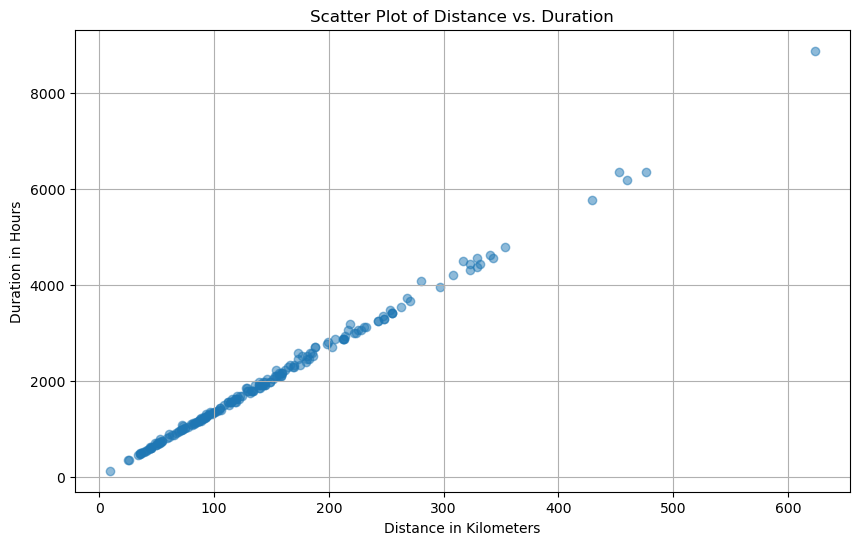

In [222]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(arc_df['distance_km'], arc_df['duration_min'], alpha=0.5)
plt.title('Scatter Plot of Distance vs. Duration')
plt.xlabel('Distance in Kilometers')
plt.ylabel('Duration in Hours')
plt.grid(True)
plt.show()

In [173]:
#### Calculate IQR
Q1 = arc_df[['distance_km', 'duration_min']].quantile(0.25)
Q3 = arc_df[['distance_km', 'duration_min']].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those beyond 1.5 times the IQR from the quartiles
outliers = arc_df[((arc_df['distance_km'] < (Q1['distance_km'] - 1.5 * IQR['distance_km'])) | (arc_df['distance_km'] > (Q3['distance_km'] + 1.5 * IQR['distance_km'])) |
                   (arc_df['duration_min'] < (Q1['duration_min'] - 1.5 * IQR['duration_min'])) | (arc_df['duration_min'] > (Q3['duration_min'] + 1.5 * IQR['duration_min'])))]
print("Detected Outliers:")
print(outliers[['Arc', 'distance_km', 'duration_min']])

Detected Outliers:
               Arc  distance_km  duration_min
18     PG988-PG872        340.0        4620.0
21     PG837-PG761        623.0        8880.0
60   PG1260-PG1143        453.0        6360.0
84     PG841-PG761        353.0        4800.0
90     PG921-PG769        460.0        6180.0
91     PG769-PG655        429.0        5760.0
93     PG769-PG774        476.0        6360.0
101    PG956-PG921        343.0        4560.0


In [176]:
arc_df

,Arc,ciudad_origen,ciudad_destino,eventos_arco,geometry,distance,duration,distance_km,duration_min
0,PG1529-PG1530,"Suchiate, Chiapas","Tapachula, Chiapas",124475.0,"LINESTRING (14.63441 -92.23982, 14.63557 -92.2...",35.6 km,8 hours 8 mins,35.6,488.0
1,PG1530-PG1491,"Tapachula, Chiapas","Mapastepec, Chiapas",98522.0,"LINESTRING (14.90446 -92.26123, 14.90412 -92.2...",103 km,22 hours 57 mins,103.0,1377.0
2,PG1491-PG1492,"Mapastepec, Chiapas","Pijijiapan, Chiapas",11333.0,"LINESTRING (15.44007 -92.8986, 15.44035 -92.89...",45.3 km,10 hours 8 mins,45.3,608.0
3,PG1492-PG1453,"Pijijiapan, Chiapas","Arriaga, Chiapas",31136.0,"LINESTRING (15.68506 -93.20811, 15.68548 -93.2...",101 km,22 hours 36 mins,101.0,1356.0
4,PG1453-PG1414,"Arriaga, Chiapas","Chahuites, Oaxaca",19893.0,"LINESTRING (16.23439 -93.90072, 16.23204 -93.9...",36.4 km,8 hours 9 mins,36.4,489.0
...,...,...,...,...,...,...,...,...,...
201,PG1192-PG1193,"Jimenez, Tamaulipas","Cruillas, Tamaulipas",986.0,"LINESTRING (24.21719 -98.48392, 24.21717 -98.4...",71.4 km,16 hours 18 mins,71.4,978.0
202,PG1193-PG1154,"Cruillas, Tamaulipas","Hualahuises, Nuevo Leon",1019.0,"LINESTRING (24.75544 -98.53699, 24.75599 -98.5...",134 km,1 day 6 hours,134.0,1800.0
203,PG1193-PG1194,"Cruillas, Tamaulipas","China, Nuevo Leon",1131.0,"LINESTRING (24.75544 -98.53699, 24.75599 -98.5...",124 km,1 day 4 hours,124.0,1680.0
204,PG1194-PG1155,"China, Nuevo Leon","General Bravo, Nuevo Leon",2205.0,"LINESTRING (25.49837 -98.97879, 25.49679 -98.9...",49.1 km,11 hours 0 mins,49.1,660.0


In [174]:
#df_filtrado.to_file("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.geojson", driver='GeoJSON')
#arc_df.to_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.csv")


In [180]:
# Convertir la columna 'geometry' de WKT a objetos shapely
arc_df['geometry'] = arc_df['geometry'].apply(wkt.loads)

# Convertir el DataFrame en un GeoDataFrame
arc_gdf = gpd.GeoDataFrame(arc_df, geometry='geometry')

# Definir el sistema de coordenadas WGS84
arc_gdf.set_crs(epsg=4326, inplace=True)

# Guardar como shapefile
#arc_gdf.to_file("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.shp")

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_18641/1127016515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arc_df['geometry'] = arc_df['geometry'].apply(wkt.loads)
/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_18641/1127016515.py:11: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  arc_gdf.to_file("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.shp")


In [227]:
arc_df= pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.csv")

In [228]:
arc_df

,Unnamed: 0,Arc,ciudad_origen,ciudad_destino,eventos_arco,geometry,distance,duration,distance_km,duration_min
0,0,PG1529-PG1530,"Suchiate, Chiapas","Tapachula, Chiapas",124475,"LINESTRING (14.63441 -92.23982, 14.63557 -92.2...",35.6 km,8 hours 8 mins,35.6,488
1,1,PG1530-PG1491,"Tapachula, Chiapas","Mapastepec, Chiapas",98522,"LINESTRING (14.90446 -92.26123, 14.90412 -92.2...",103 km,22 hours 57 mins,103.0,1377
2,2,PG1491-PG1492,"Mapastepec, Chiapas","Pijijiapan, Chiapas",11333,"LINESTRING (15.44007 -92.8986, 15.44035 -92.89...",45.3 km,10 hours 8 mins,45.3,608
3,3,PG1492-PG1453,"Pijijiapan, Chiapas","Arriaga, Chiapas",31136,"LINESTRING (15.68506 -93.20811, 15.68548 -93.2...",101 km,22 hours 36 mins,101.0,1356
4,4,PG1453-PG1414,"Arriaga, Chiapas","Chahuites, Oaxaca",19893,"LINESTRING (16.23439 -93.90072, 16.23204 -93.9...",36.4 km,8 hours 9 mins,36.4,489
...,...,...,...,...,...,...,...,...,...,...
198,198,PG841-PG761,"Durango, Durango","Mazatlan, Sinaloa",1351,"LINESTRING (24.03525 -104.66368, 24.03237 -104...",353 km,3 days 8 hours,353.0,4800
199,199,PG1072-PG1113,"San Luis Potosi, San Luis Potosi","Doctor Arroyo, Nuevo Leon",4165,"LINESTRING (22.49923 -100.49957, 22.49994 -100...",174 km,1 day 15 hours,174.0,2340
200,200,PG1695-PG1654,"Progreso, Yucatan","Campeche, Campeche",1757,"LINESTRING (21.28217 -89.66366, 21.28202 -89.6...",205 km,1 day 22 hours,205.0,2760
201,201,PG1810-PG1772,"Tulum, Quintana Roo","Valladolid, Yucatan",18,"LINESTRING (20.16921 -87.44957, 20.16927 -87.4...",106 km,23 hours 51 mins,106.0,1431


Filas con geometrías no válidas:
Empty DataFrame
Columns: [Unnamed: 0, Arc, ciudad_origen, ciudad_destino, eventos_arco, geometry, distance, duration, distance_km, duration_min, valid_geometry]
Index: []
Filas con geometrías inválidas en el GeoDataFrame:
Empty GeoDataFrame
Columns: [Unnamed: 0, Arc, ciudad_origen, ciudad_destino, eventos_arco, geometry, distance, duration, distance_km, duration_min, valid_geometry]
Index: []


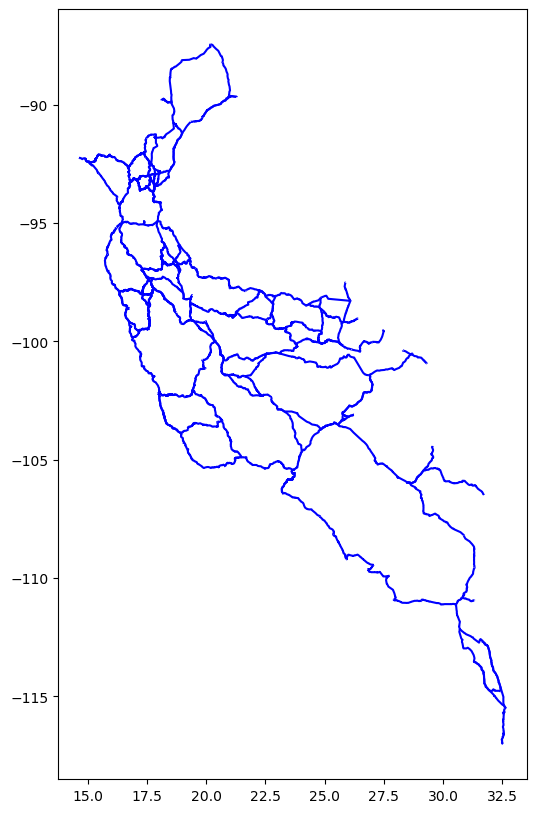

In [229]:
# Verificar que todos los valores en la columna 'geometry' son válidos
def is_valid_linestring(geometry):
    try:
        # Verificar si ya es un objeto LineString
        if isinstance(geometry, LineString):
            return geometry.is_valid
        # Convertir el valor de geometry a un objeto shapely
        geom = wkt.loads(geometry)
        return geom.is_valid
    except Exception as e:
        print(f"Error en la geometría: {e}")
        return False

arc_df['valid_geometry'] = arc_df['geometry'].apply(is_valid_linestring)

# Filtrar filas con geometrías no válidas
invalid_geometries = arc_df[~arc_df['valid_geometry']]

# Mostrar filas con geometrías no válidas
print("Filas con geometrías no válidas:")
print(invalid_geometries)

# Convertir la columna 'geometry' a objetos shapely si aún no lo están
def convert_to_linestring(geometry):
    if isinstance(geometry, LineString):
        return geometry
    return wkt.loads(geometry)

arc_df['geometry'] = arc_df['geometry'].apply(convert_to_linestring)

# Crear un GeoDataFrame a partir del DataFrame
gdf = gpd.GeoDataFrame(arc_df, geometry='geometry')

# Comprobar si hay geometrías inválidas en el GeoDataFrame
invalid_gdf = gdf[~gdf.is_valid]

# Mostrar filas con geometrías inválidas en el GeoDataFrame
print("Filas con geometrías inválidas en el GeoDataFrame:")
print(invalid_gdf)

# Intentar trazar las geometrías
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', edgecolor='black')
plt.show()


## segmentacion y asignacion de valores a polyline

In [ ]:
# Si quieres ver las primeras filas del DataFrame filtrado para verifica
df_filtrado.head()